<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


Connect to the database.


In [100]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""


# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """

SELECT 
    name as Table_Name 
FROM
    sqlite_master 
WHERE
    type = 'table'

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT 
    Age,
    COUNT(*) as count
FROM 
    master
group by 
    age
order by 
    age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # The name of the table you wish to describe

# SQL query to retrieve the SQL statement used to create the table from the sqlite_master table
QUERY = """
SELECT 
    sql 
FROM 
    sqlite_master
WHERE 
    name= '{}'
""".format(table_name)  # Format the query with the specified table name

# Execute the SQL query and store the result in a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Print the SQL statement used to create the table, which is located in the first row and first column of the DataFrame
print(df.iat[0, 0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [10]:
conn

In [18]:
QUERY = """
SELECT 
    ConvertedComp 
FROM 
    master
"""
pd_1 = pd.read_sql_query(QUERY,conn)

<Axes: ylabel='Frequency'>

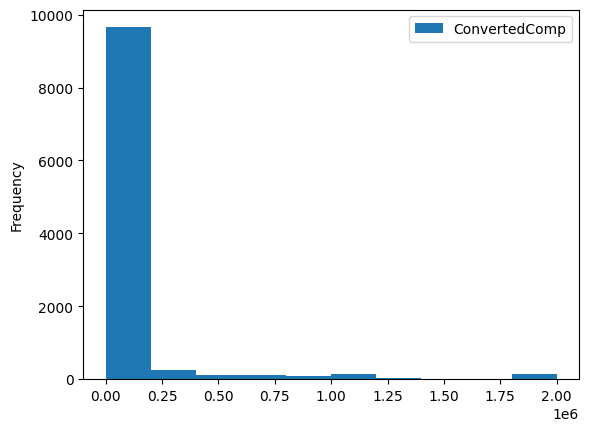

In [19]:
pd_1.plot.hist()

### Box Plots


Plot a box plot of `Age.`


In [21]:
# your code goes here
# your code goes here
QUERY2 = """
SELECT 
    Age 
FROM 
    master
"""
pd_2 = pd.read_sql_query(QUERY2,conn)


<Axes: >

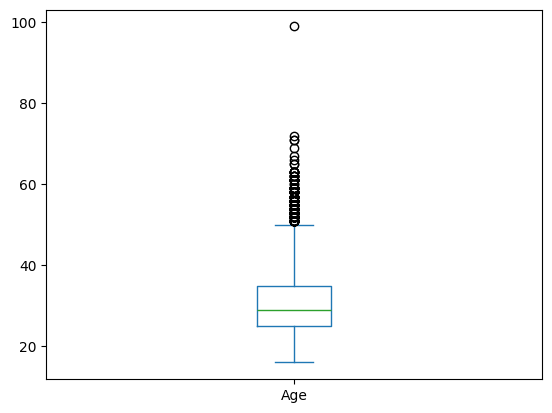

In [22]:
pd_2.plot.box()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [23]:
# your code goes here
# your code goes here
# your code goes here
QUERY3 = """
SELECT 
    Age,
    WorkweekHrs 
FROM 
    master
"""
pd_3 = pd.read_sql_query(QUERY3,conn)


In [30]:
pd_3.describe()

,Age,WorkWeekHrs
count,11111.000000,11276.000000
mean,30.779318,42.064606
std,7.393680,24.672741
min,16.000000,3.000000
25%,25.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,43.000000
max,99.000000,1012.000000


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

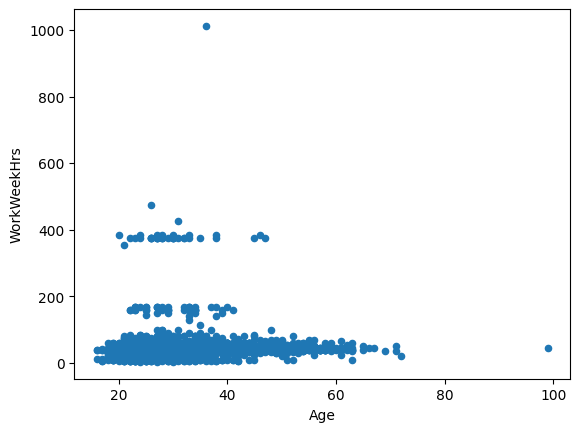

In [31]:
pd_3.plot.scatter(x = "Age", y = "WorkWeekHrs")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [38]:
# your code goes here
QUERY4 = """
SELECT 
    Age,
    WorkweekHrs,
    CodeRevHrs
FROM 
    master
"""

pd_4 = pd.read_sql_query(QUERY4,conn)



In [41]:
pd_4

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0
...,...,...,...
11393,36.0,40.0,NaN
11394,25.0,40.0,5.0
11395,34.0,40.0,5.0
11396,25.0,42.5,2.0


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

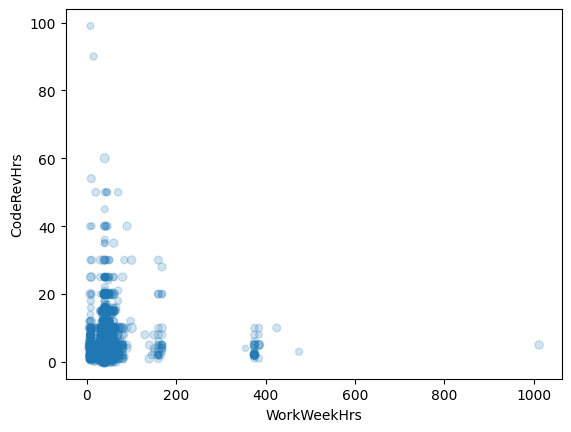

In [45]:
pd_4.plot.scatter(x = 'WorkWeekHrs', y = 'CodeRevHrs', s='Age', alpha = 0.2)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [101]:
# your code goes here
QUERY_INTEREST = """
SELECT 
    *
FROM 
    DatabaseDesireNextYear
"""

pd_5 = pd.read_sql_query(QUERY_INTEREST,conn)



In [102]:
pd_5.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


<Axes: ylabel='DatabaseDesireNextYear'>

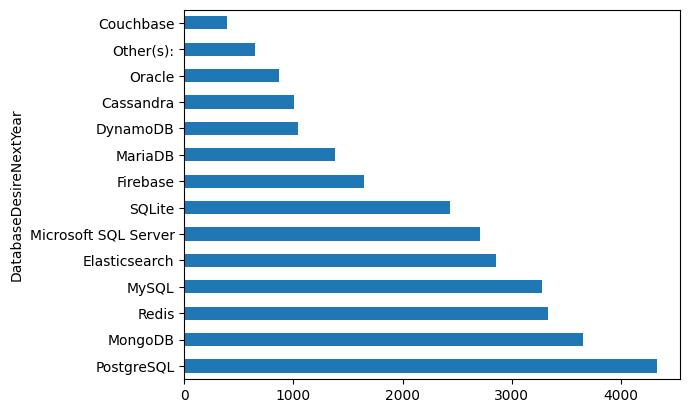

In [103]:
pd_5['DatabaseDesireNextYear'].value_counts().plot.barh()

<Axes: ylabel='count'>

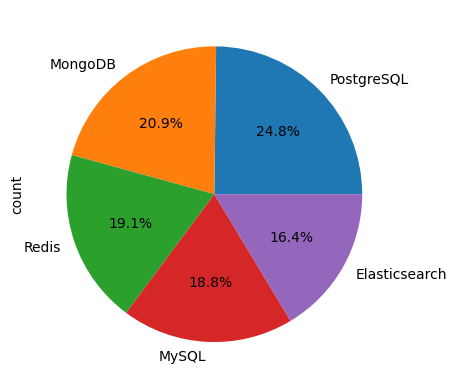

In [104]:
pd_5['DatabaseDesireNextYear'].value_counts().nlargest(5).plot.pie(autopct='%1.1f%%')

In [105]:
# your code goes here
QUERY_INTEREST2 = """
SELECT 
    *
FROM 
    LanguageDesireNextYear
"""

pd_10 = pd.read_sql_query(QUERY_INTEREST2,conn)

<Axes: ylabel='LanguageDesireNextYear'>

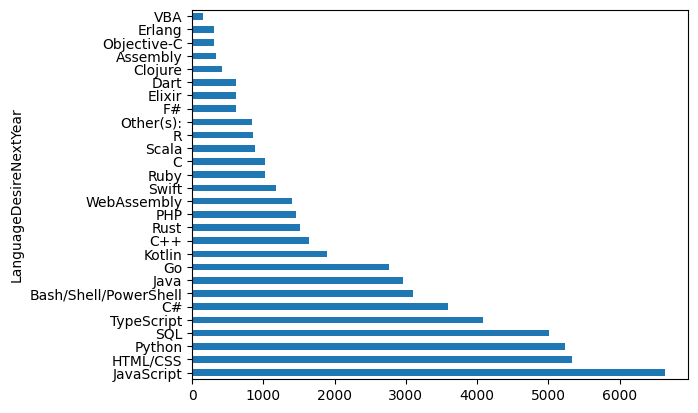

In [108]:
pd_10['LanguageDesireNextYear'].value_counts().plot.barh()

In [110]:
# your code goes here
QUERY_INTEREST3 = """
SELECT 
    *
FROM 
    DatabaseWorkedWith
"""

pd_11 = pd.read_sql_query(QUERY_INTEREST3,conn)

pd_11


,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [120]:
pd_11.nunique()

Respondent            10945
DatabaseWorkedWith       14
dtype: int64

In [119]:
pd_11.groupby('DatabaseWorkedWith')['Respondent'].nunique().sort_values(ascending=False)

DatabaseWorkedWith
MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
                        ... 
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
Name: Respondent, Length: 14, dtype: int64

In [142]:
respondent_counts = pd_11.groupby('Respondent')['DatabaseWorkedWith'].nunique()
unique_respondents = respondent_counts[respondent_counts == 1]
unique_respondents.index

Index([   25,    38,    70,    74,    75,    78,    87,    92,    94,    97,
       ...
       25092, 25093, 25111, 25112, 25123, 25128, 25136, 25137, 25138, 25142],
      dtype='int64', name='Respondent', length=2515)

In [144]:
pd_11

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [149]:
pd_11[(pd_11["DatabaseWorkedWith"] == "MySQL") & (pd_11["Respondent"].isin(unique_respondents.index))].nunique()

Respondent            474
DatabaseWorkedWith      1
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [69]:
# your code goes here
QUERY_30_35 = """
SELECT 
    WorkWeekHrs, 
    CodeRevHrs,
    age
FROM 
    master
WHERE 
    age >= '30' AND
    age <= 35
"""

pd_6 = pd.read_sql_query(QUERY_30_35,conn)



In [72]:
pd_6

,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0
...,...,...,...
2937,42.0,4.0,32.0
2938,50.0,2.0,32.0
2939,56.0,14.0,32.0
2940,40.0,5.0,34.0


<Axes: xlabel='Age'>

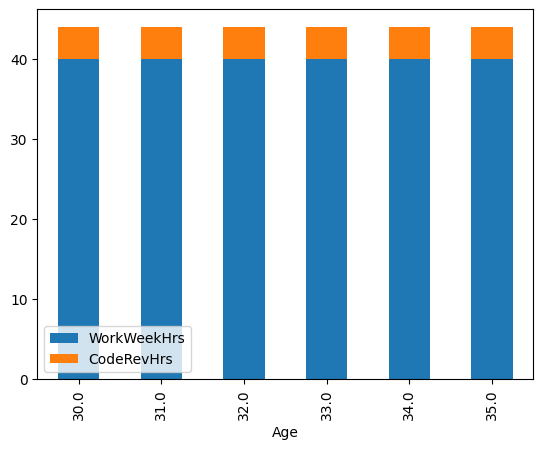

In [86]:
pd_6.groupby('Age').agg('median').plot(kind = 'bar', stacked= True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [87]:
# your code goes here
QUERY_45_60 = """
SELECT 
    ConvertedComp,
    age
FROM 
    master
WHERE 
    age >= 45 AND
    age <= 60
"""

pd_7 = pd.read_sql_query(QUERY_45_60,conn)


<Axes: xlabel='Age'>

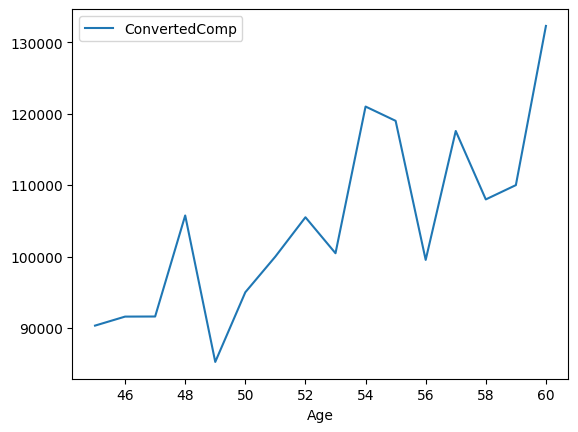

In [89]:
pd_7.groupby('Age').agg('median').plot.line()

<Axes: xlabel='Age'>

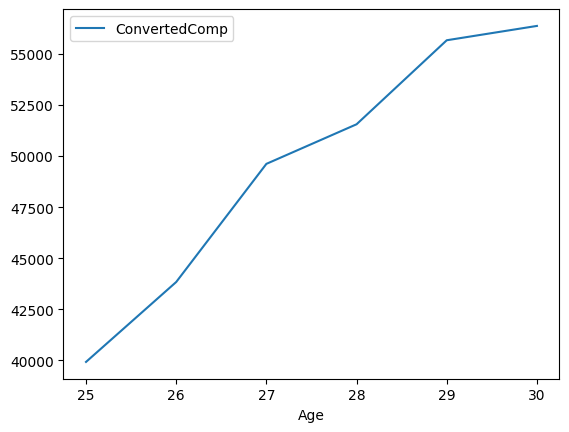

In [150]:
# your code goes here
QUERY_25_30 = """
SELECT 
    ConvertedComp,
    age
FROM 
    master
WHERE 
    age >= 25 AND
    age <= 30
"""

pd_12 = pd.read_sql_query(QUERY_25_30,conn)
pd_12.groupby('Age').agg('median').plot.line()

### Bar Chart


In [152]:
QUERY_9 = """
SELECT 
    *
FROM 
    DevType
"""

pd_21 = pd.read_sql_query(QUERY_9,conn)
pd_21

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


Create a horizontal bar chart using column `MainBranch.`


In [92]:
# your code goes here

# your code goes here
QUERY_Final = """
SELECT 
    MainBranch
FROM 
    master
"""

pd_8 = pd.read_sql_query(QUERY_Final,conn)

<Axes: ylabel='MainBranch'>

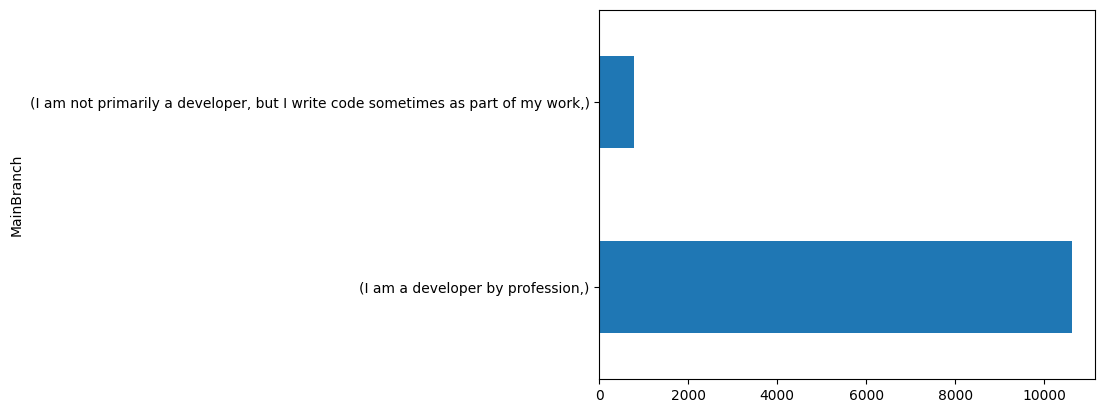

In [94]:
pd_8.value_counts().plot.barh()

Close the database connection.


In [95]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
